# K-Means Clustering

problem statement : 

Build a machine learning model to create group of mall customers based on their annual income and spending score for a given dataset
https://drive.google.com/open?id=1Lp3yU_gql-OQSm-t4qbLs-8QzWmxRoc0

In [1]:
#importing necessary library
#importing matplotlib 
import matplotlib.pyplot as plt
#importing seaborn
import seaborn as sea
#importing pandas 
import pandas as pd
#importing numpy
import numpy as np

#importing job-lib
import joblib

# importing my custom library file methods
import sys
sys.path.append('/home/admin3/ml_with_phoenix/clustering/lib_and_dataset/')
from ipynb.fs.full.my_custom_library import *

#importing scikit learn  library classes
import sklearn.model_selection as model_selection
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
# loading csv data from the file given in the url
data_set = pd.read_csv("/home/admin3/ml_with_phoenix/clustering/lib_and_dataset/Mall_Customers.csv")
#prinding info of data
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### Data -pre processing 

In [2]:
data_set.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data_set['CustomerID'].describe()

count    200.000000
mean     100.500000
std       57.879185
min        1.000000
25%       50.750000
50%      100.500000
75%      150.250000
max      200.000000
Name: CustomerID, dtype: float64

In [4]:
data_set['Genre'].describe()

count        200
unique         2
top       Female
freq         112
Name: Genre, dtype: object

In [5]:
data_set['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

In [6]:
data_set['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

In [7]:
data_set['Spending Score (1-100)'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

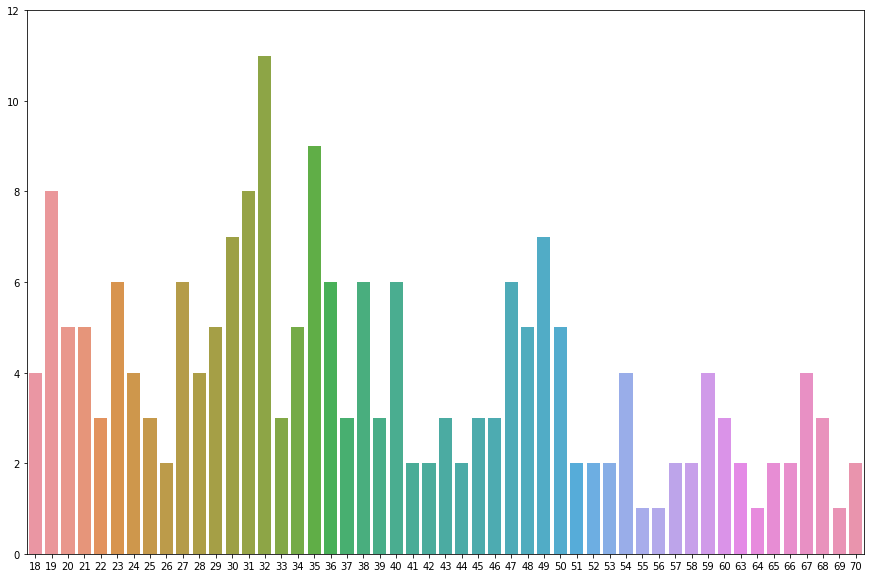

In [8]:
#obtaining count of ages in age column to see the frequency of ages
counts_ages = data_set.Age.value_counts()
#obtaining array of unique ages in array
ages = counts_ages.to_list()
#taking counts in a seperate array
counts = counts_ages.index
#plotting bar - chart to visualise counts
plt.figure(figsize=(15,10))
plt.ylim(0,12)
sea.barplot(y=ages,x=counts)

In [9]:
# pre - processing our data based on general method ke[t in my library
# one hot encoding for "gener"  column and removing un-necessary columns
values,encoder = pre_processing_mall(data_set,OneHotEncoder(),1)

In [10]:
values.shape

(200, 5)

#### Splitting train and test data set

In [11]:
# splitting train and test set
train,test = model_selection.train_test_split(values,test_size=0.25,random_state=0)

In [12]:
# looking at train data set shape
train.shape

(150, 5)

In [13]:
# looking at test data set shape
test.shape

(50, 5)

#### Training Model

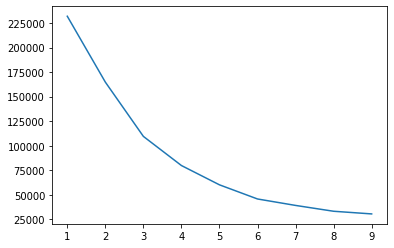

In [14]:
# finding optimal value of k in wich this dat should be clustered 
k=10
wcss=[]
for i in range(1,k):
    cluster= train_or_predict(train,KMeans(n_clusters=i, random_state=0),1)
    predicted_train = train_or_predict(train,cluster)
    wcss.append(cluster.inertia_)

# plotting wcss graph to see the valiation of wcss 
plt.plot(range(1,k),wcss) 

In [15]:
# after seeing above wcss curve we came to conclusion that 
# the optimal value of clusters should be 5 or 6 ,, i am taking 6 
cluster= train_or_predict(train,KMeans(n_clusters=6, random_state=0),1)

##### Predicting Outputs

In [16]:
# clustering train set
predicted_train = train_or_predict(train,cluster)

In [17]:
# looking at clusterd output value
predicted_train

array([1, 5, 0, 5, 2, 3, 3, 0, 1, 1, 2, 1, 2, 4, 2, 1, 1, 2, 5, 1, 2, 1,
       2, 1, 0, 1, 1, 3, 4, 2, 2, 1, 0, 2, 1, 1, 3, 1, 0, 2, 5, 3, 0, 1,
       0, 0, 2, 5, 5, 5, 0, 2, 1, 3, 5, 1, 5, 1, 2, 4, 5, 5, 5, 1, 4, 2,
       4, 0, 2, 3, 4, 5, 1, 5, 5, 1, 4, 1, 0, 0, 3, 5, 5, 5, 2, 2, 0, 5,
       2, 4, 1, 1, 4, 1, 5, 4, 5, 0, 1, 5, 5, 2, 4, 3, 2, 1, 2, 0, 3, 3,
       5, 2, 4, 0, 2, 0, 3, 5, 2, 2, 4, 5, 1, 1, 5, 0, 2, 1, 5, 4, 2, 5,
       0, 0, 0, 4, 5, 0, 5, 1, 5, 3, 4, 4, 5, 1, 0, 1, 5, 0], dtype=int32)

In [18]:
# clustering test set
predicted_test = train_or_predict(test,cluster)

In [19]:
# /looking at clustered output value
predicted_test

array([3, 0, 1, 1, 2, 0, 4, 0, 3, 0, 5, 2, 0, 0, 1, 4, 4, 0, 4, 1, 2, 2,
       4, 2, 1, 2, 2, 2, 5, 3, 3, 1, 0, 5, 3, 2, 2, 3, 1, 1, 0, 1, 3, 5,
       0, 1, 3, 5, 1, 2], dtype=int32)

In [20]:
# checking number of elemets in each cluster of train clusters
cluster_elements(predicted_train)

elements in cluster  0   is  :  24
elements in cluster  1   is  :  34
elements in cluster  2   is  :  28
elements in cluster  3   is  :  13
elements in cluster  4   is  :  17
elements in cluster  5   is  :  34


In [21]:
# checking number of elemets in each cluster of test clusters
cluster_elements(predicted_test)

elements in cluster  0   is  :  10
elements in cluster  1   is  :  11
elements in cluster  2   is  :  11
elements in cluster  3   is  :  8
elements in cluster  4   is  :  5
elements in cluster  5   is  :  5


In [24]:
from sklearn.metrics import silhouette_score
# Print results
print('kmeans: {}'.format(silhouette_score(train, cluster.labels_, 
                                           metric='euclidean')))

kmeans: 0.4473277943618454
